In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


import re


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('Training Data -Table 1.csv')
df.drop(['Queue', 'Process','Unnamed: 4'],axis=1,inplace=True)
df.head(10)

,ExceptionMessage,ExceptionType
0,Invite not found in both CBS mailbox,Business Exception
1,Interviewer xxxx mail ID not found in invite.,Business Exception
2,Invite not found in both TAX and PAS mailbox,Business Exception
3,InternalFailed to evaluate expression 'Replace...,System Exception
4,Could not execute code stage because exception...,System Exception
5,Email Id not found Failed to read Email,Business Exception
6,Automatically set exception at CleanUp,System Exception
7,Automatically set exception on session end,System Exception
8,Recruiter xxxx mail ID not found in invite.,Business Exception
9,Invite not found in Assurance Mailbox,Business Exception


Text(0.5, 1.0, 'Message Type Data Distribution')

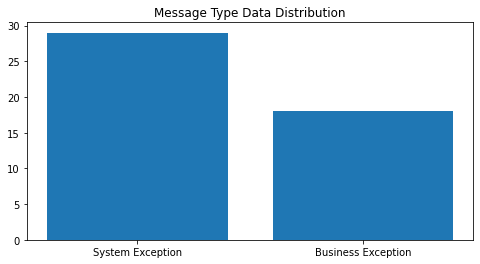

In [ ]:
val_count = df.ExceptionType.value_counts()

plt.figure(figsize=(8,4))
plt.bar(val_count.index, val_count.values)
plt.title("Message Type Data Distribution")

In [ ]:
import random
random_idx_list = [random.randint(1,len(df.ExceptionMessage)) for i in range(10)] # creates random indexes to choose from dataframe
df.loc[random_idx_list,:].head(10)

,ExceptionMessage,ExceptionType
24,BBC Update failed for BBC ID- 421- The remote ...,System Exception
38,Failed to fetch data from RACE tool due to sit...,System Exception
22,"Email does not contains the right Subject, sub...",Business Exception
31,Error in Input File,Business Exception
39,Failed to fetch data from RACE tool due to sit...,System Exception
7,Automatically set exception on session end,System Exception
20,Unexpected Error occured in adding requests in...,System Exception
34,Exception occured at ES_ITS_TDR_SCCM : Failed ...,System Exception
10,Exception occured while accessing article page...,Business Exception
28,Failed to perform step 1 in Write Stage 'Write...,System Exception


In [ ]:
stop_words = stopwords.words('english')
stemmer = SnowballStemmer('english')

text_cleaning_re = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"

In [ ]:
def preprocess(text, stem=False):
  text = re.sub(text_cleaning_re, ' ', str(text).lower()).strip()
  tokens = []
  for token in text.split():
    if token not in stop_words:
      if stem:
        tokens.append(stemmer.stem(token))
      else:
        tokens.append(token)
  return " ".join(tokens)

In [ ]:
df.ExceptionMessage = df.ExceptionMessage.apply(lambda x: preprocess(x))

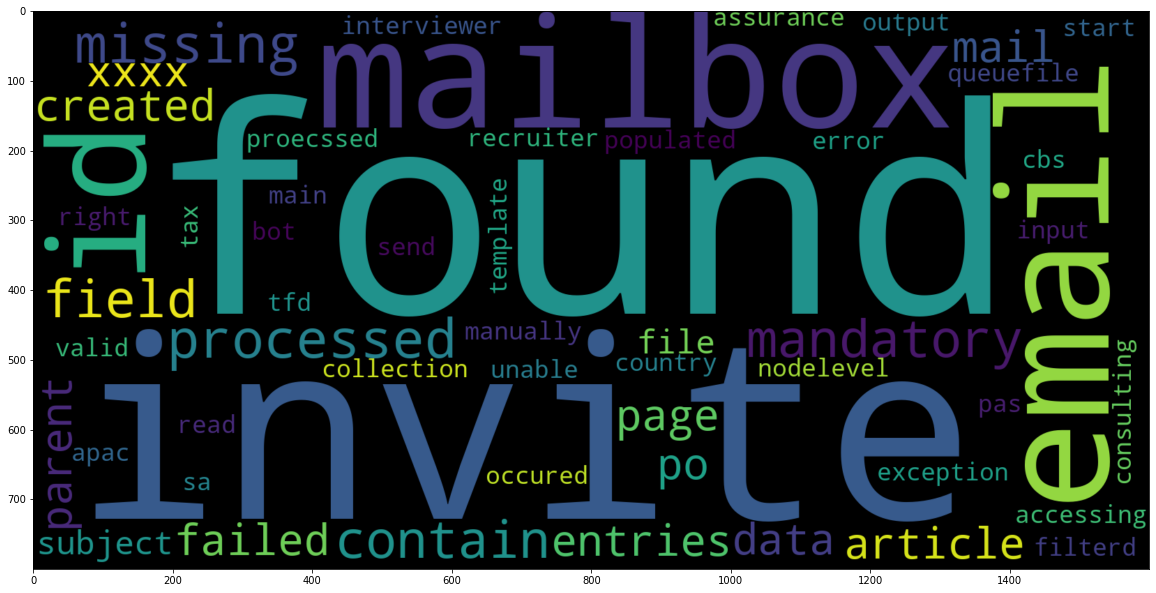

In [ ]:
from wordcloud import WordCloud

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.ExceptionType == 'Business Exception'].ExceptionMessage))
plt.imshow(wc , interpolation = 'bilinear')

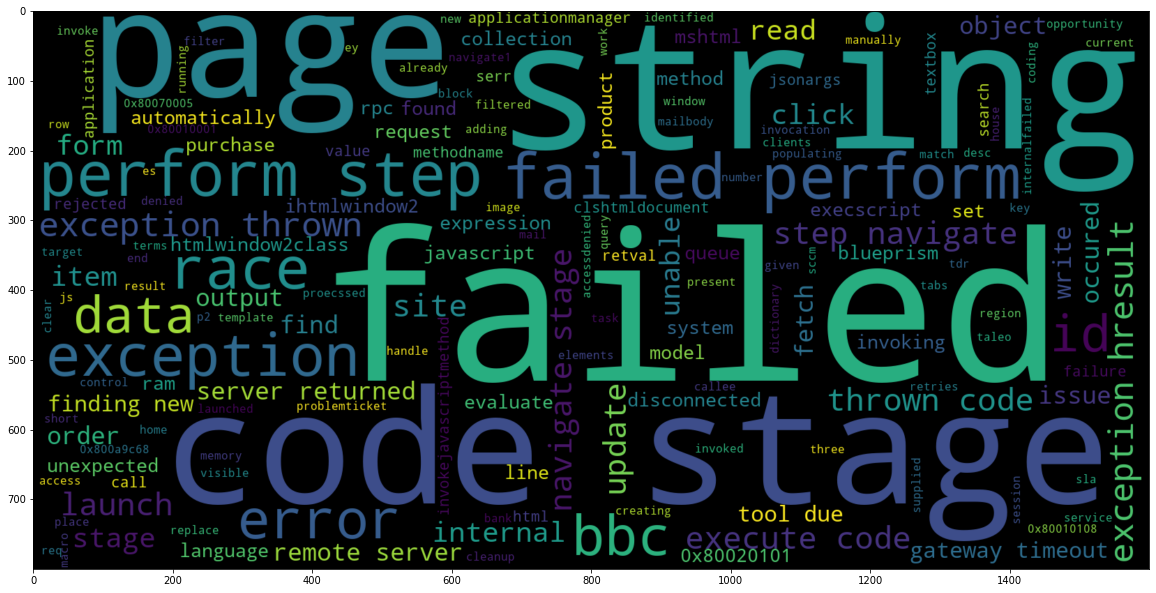

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.ExceptionType == 'System Exception'].ExceptionMessage))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
TRAIN_SIZE = 0.8
MAX_NB_WORDS = 100000
MAX_SEQUENCE_LENGTH = 30

In [ ]:
train_data, test_data = train_test_split(df, test_size=1-TRAIN_SIZE,
                                         random_state=7) # Splits Dataset into Training and Testing set
print("Train Data size:", len(train_data))
print("Test Data size", len(test_data))

Train Data size: 37
Test Data size 10


In [ ]:
train_data.head(10)

,ExceptionMessage,ExceptionType
29,failed perform step 1 navigate stage navigate1...,System Exception
44,bbc update failed bbc id 330 remote server ret...,System Exception
32,internal failed perform step 1 write stage cle...,System Exception
18,2036 sa entries processed,Business Exception
17,mandatory field missing po created parent,Business Exception
33,could execute code stage exception thrown code...,System Exception
27,email template found bot failed send output file,Business Exception
41,could execute code stage exception thrown code...,System Exception
9,invite found assurance mailbox,Business Exception
2,invite found tax pas mailbox,Business Exception


In [ ]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_data.ExceptionMessage)

word_index = tokenizer.word_index
vocab_size = len(tokenizer.word_index) + 205
print("Vocabulary Size :", vocab_size)

Vocabulary Size : 399


In [ ]:
from keras.preprocessing.sequence import pad_sequences

x_train = pad_sequences(tokenizer.texts_to_sequences(train_data.ExceptionMessage),
                        maxlen = MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(tokenizer.texts_to_sequences(test_data.ExceptionMessage),
                       maxlen = MAX_SEQUENCE_LENGTH)

print("Training X Shape:",x_train.shape)
print("Testing X Shape:",x_test.shape)

Training X Shape: (37, 30)
Testing X Shape: (10, 30)


In [ ]:
encoder = LabelEncoder()
encoder.fit(labels)

y_train = encoder.transform(train_data.ExceptionType.to_list()[::-1])
y_test = encoder.transform(test_data.ExceptionType.to_list()[::-1])

y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (37, 1)
y_test shape: (10, 1)


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2021-04-30 16:54:17--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-04-30 16:54:17--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-04-30 16:54:18--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

In [ ]:
GLOVE_EMB = '/content/glove.6B.300d.txt'
EMBEDDING_DIM = 300
LR = 1e-3
BATCH_SIZE = 1024
EPOCHS = 10
MODEL_PATH = '.../output/kaggle/working/best_model.hdf5'

In [ ]:
embeddings_index = {}

f = open(GLOVE_EMB)
for line in f:
  values = line.split()
  word = value = values[0]
  coefs = np.asarray(values[1:], dtype='float32')
  embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))

Found 400000 word vectors.


In [ ]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
for word, i in word_index.items():
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
embedding_layer = tf.keras.layers.Embedding(vocab_size,
                                          EMBEDDING_DIM,
                                          weights=[embedding_matrix],
                                          input_length=MAX_SEQUENCE_LENGTH,
                                          trainable=False)

In [ ]:
from tensorflow.keras.layers import Conv1D, Bidirectional, LSTM, Dense, Input, Dropout
from tensorflow.keras.layers import SpatialDropout1D
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
sequence_input = Input(shape=(MAX_SEQUENCE_LENGTH,), dtype='int32')
embedding_sequences = embedding_layer(sequence_input)
x = SpatialDropout1D(0.2)(embedding_sequences)
x = Conv1D(64, 5, activation='relu')(x)
x = Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2))(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(sequence_input, outputs)

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

model.compile(optimizer=Adam(learning_rate=LR), loss='binary_crossentropy',
              metrics=['accuracy'])
ReduceLROnPlateau = ReduceLROnPlateau(factor=0.1,
                                     min_lr = 0.01,
                                     monitor = 'val_loss',
                                     verbose = 1)

In [ ]:
print("Training on GPU...") if tf.test.is_gpu_available() else print("Training on CPU...")

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Training on GPU...


In [ ]:
history = model.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS,
                    validation_data=(x_test, y_test), callbacks=[ReduceLROnPlateau])

Epoch 1/10
1/1 [==============================] - 37s 37s/step - loss: 0.6921 - accuracy: 0.5135 - val_loss: 0.6897 - val_accuracy: 0.6000
Epoch 2/10
1/1 [==============================] - 0s 235ms/step - loss: 0.6722 - accuracy: 0.6486 - val_loss: 0.6881 - val_accuracy: 0.6000
Epoch 3/10
1/1 [==============================] - 0s 227ms/step - loss: 0.6648 - accuracy: 0.6216 - val_loss: 0.6919 - val_accuracy: 0.6000
Epoch 4/10
1/1 [==============================] - 0s 252ms/step - loss: 0.6482 - accuracy: 0.6216 - val_loss: 0.7019 - val_accuracy: 0.6000
Epoch 5/10
1/1 [==============================] - 0s 238ms/step - loss: 0.6560 - accuracy: 0.6216 - val_loss: 0.7136 - val_accuracy: 0.6000
Epoch 6/10
1/1 [==============================] - 0s 224ms/step - loss: 0.6273 - accuracy: 0.6216 - val_loss: 0.7233 - val_accuracy: 0.6000
Epoch 7/10
1/1 [==============================] - 0s 224ms/step - loss: 0.5971 - accuracy: 0.6216 - val_loss: 0.7304 - val_accuracy: 0.5000
Epoch 8/10
1/1 [=====

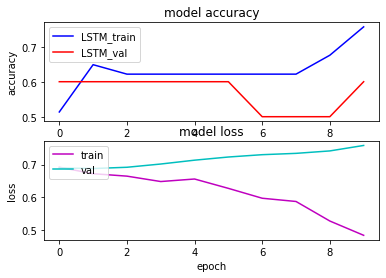

In [ ]:
s, (at, al) = plt.subplots(2,1)
at.plot(history.history['accuracy'], c= 'b')
at.plot(history.history['val_accuracy'], c='r')
at.set_title('model accuracy')
at.set_ylabel('accuracy')
at.set_xlabel('epoch')
at.legend(['LSTM_train', 'LSTM_val'], loc='upper left')

al.plot(history.history['loss'], c='m')
al.plot(history.history['val_loss'], c='c')
al.set_title('model loss')
al.set_ylabel('loss')
al.set_xlabel('epoch')
al.legend(['train', 'val'], loc = 'upper left')

In [ ]:
def decode_sentiment(score):
    return "Business Exception" if score>0.5 else "System Exception"


scores = model.predict(x_test, verbose=1, batch_size=10000)
y_pred_1d = [decode_sentiment(score) for score in scores]

1/1 [==============================] - 0s 411ms/step


In [ ]:
import itertools
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=13)
    plt.yticks(tick_marks, classes, fontsize=13)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=17)
    plt.xlabel('Predicted label', fontsize=17)

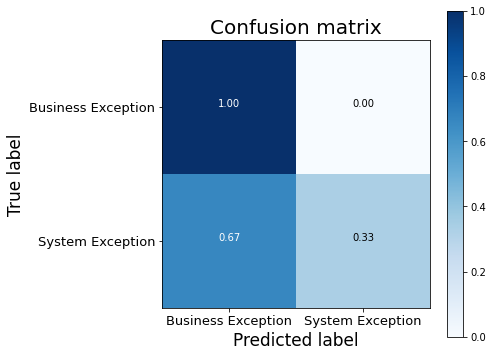

In [ ]:
cnf_matrix = confusion_matrix(test_data.ExceptionType.to_list(), y_pred_1d)
plt.figure(figsize=(6,6))
plot_confusion_matrix(cnf_matrix, classes=test_data.ExceptionType.unique(), title="Confusion matrix")
plt.show()

In [ ]:
print(classification_report(list(test_data.ExceptionType), y_pred_1d))

                    precision    recall  f1-score   support

Business Exception       0.50      1.00      0.67         4
  System Exception       1.00      0.33      0.50         6

          accuracy                           0.60        10
         macro avg       0.75      0.67      0.58        10
      weighted avg       0.80      0.60      0.57        10



In [ ]:
test = df.ExceptionMessage[2:4]
f_test = pad_sequences(tokenizer.texts_to_sequences(test),
                        maxlen = MAX_SEQUENCE_LENGTH)

In [ ]:
f_test

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22,
          7, 122, 123,  35],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 182, 183, 184, 185, 186, 187,  99,
         11,  12,  86, 188]], dtype=int32)

In [ ]:
scores = model.predict(f_test, verbose=1, batch_size=1000)
y_pred_1d2 = [decode_sentiment(score) for score in scores]
y_pred_1d2

1/1 [==============================] - 0s 51ms/step


['System Exception', 'Business Exception']

In [ ]:
op = df.ExceptionType[2:4]
op

2    Business Exception
3      System Exception
Name: ExceptionType, dtype: object

In [ ]:
model.save('lstm_model.h5')